# Day 1: Simple Linear Regression

In this notebook we will use house sales dataset to predict house prices using simple (one input) linear regression.

In [12]:
# import necessary packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

## Import housing dataset

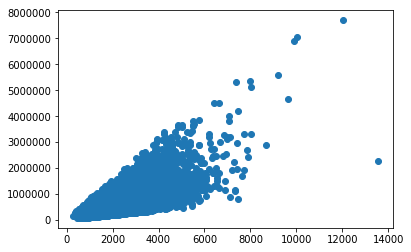

In [13]:
data = pd.read_csv('house_data.csv')

# sns.pairplot(data, x_vars='sqft_living', y_vars='price', kind='reg')

plt.scatter(data['sqft_living'], data['price'])
plt.show()

In [34]:
# Feature columns
feature_columns = ['sqft_living']

# Input data
X = data[feature_columns]

# Input data labels
Y = data['price']

In [35]:
X.head()

,sqft_living
0,1180
1,2570
2,770
3,1960
4,1680


In [36]:
X.insert(loc=0, column='bias', value=1)
X.head()

,bias,sqft_living
0,1,1180
1,1,2570
2,1,770
3,1,1960
4,1,1680


## Split data into training and testing

80/20 train/test split

In [37]:
# Splitting the dataset
from sklearn.cross_validation import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y)
print(X.shape)
print(X_train.shape)
print(X_test.shape)

(21613, 2)
(16209, 2)
(5404, 2)


## Build a simple linear regression model

In [38]:
# Let's compute the mean of the House Prices in 2 different ways.
prices = data['price'] # extract the price column of the sales DataFrame 

# recall that the arithmetic average (the mean) is the sum of the prices divided by the total number of houses:
sum_prices = prices.sum()
num_houses = prices.size 
avg_price_1 = sum_prices/num_houses
avg_price_2 = prices.mean() # if you just want the average, the .mean() function
print("average price via method 1: " + str(avg_price_1))
print("average price via method 2: " + str(avg_price_2))

average price via method 1: 540088.1419053348
average price via method 2: 540088.1419053348


This function compute the simple linear regression slope and intercept

In [105]:
# Closed form solution 1
def simple_linear_regression_cf(input_feature, output):
    weights = np.dot(np.linalg.pinv(np.dot(input_feature.transpose(), input_feature)), np.dot(input_feature.transpose(), output))
    intercept = float(weights[0])
    slope = float(weights[1])
    return intercept, slope

In [106]:
intercept, slope = simple_linear_regression_cf(X_train, Y_train)

In [107]:
print("Intercept: " + str(intercept))
print("Slope: " + str(slope))

Intercept: -36658.47178198164
Slope: 276.73227037266383


Exercise: Use second method of closed form solution to compute intercept and slope

In [108]:
def simple_linear_regression(input_feature, output):
    # compute the sum of input_feature and output
    
    # compute the product of the output and the input_feature and its sum
    
    # compute the squared value of the input_feature and its sum
    
    # use the formula for the slope
    
    # use the formula for the intercept
    
    return (intercept, slope)

## Predicting Values

In [102]:
def get_regression_predictions(input_feature, intercept, slope):
    # calculate the predicted values:
    predicted_values = []
    input_feature = np.array(input_feature)
    for i in input_feature:
        predicted_values.append(intercept * i[0] + slope * i[1])
    return predicted_values

In [109]:
Y_pred = get_regression_predictions(X_test, intercept, slope)

In [110]:
pd.Series(Y_pred).head()

0    763097.789595
1    242841.121294
2    336930.093221
3    433786.387852
4    303722.220776
dtype: float64

In [111]:
Y_test.head()

20343    855000
8125     200000
836      430000
7980     895000
14315    280000
Name: price, dtype: int64

## Residual Sum of Squares

Exercise: Complete the function for RSS.

In [ ]:
def get_residual_sum_of_squares(input_feature, output, intercept, slope):
    # First get the predictions

    # then compute the residuals (since we are squaring it doesn't matter which order you subtract)

    # square the residuals and add them up

    return(RSS)

In [113]:
from sklearn import metrics

print(metrics.mean_absolute_error(Y_test, Y_pred))
print(metrics.mean_squared_error(Y_test, Y_pred))
print(np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))

180006.81032302094
81107473464.90987
284793.73845804593


In [76]:
X.head()

,bias,sqft_living
0,1,1180
1,1,2570
2,1,770
3,1,1960
4,1,1680


In [77]:
X.head(10)

,bias,sqft_living
0,1,1180
1,1,2570
2,1,770
3,1,1960
4,1,1680
5,1,5420
6,1,1715
7,1,1060
8,1,1780
9,1,1890


In [78]:
Y.head(10)

0     221900
1     538000
2     180000
3     604000
4     510000
5    1225000
6     257500
7     291850
8     229500
9     323000
Name: price, dtype: int64

In [81]:
data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [82]:
data[['sqft_living', 'price']]

,sqft_living,price
0,1180,221900
1,2570,538000
2,770,180000
3,1960,604000
4,1680,510000
5,5420,1225000
6,1715,257500
7,1060,291850
8,1780,229500
9,1890,323000
